In [44]:
%run ../setup_notebook.ipynb

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [45]:
# notebook specific imports
from utils import cacher
import pickle
from termcolor import cprint
from subsets_analysis import Subsets
import time

In [46]:
pkl_path = '/home/jrowland/mnt/qnap/run_pkls'

In [ ]:
mouse_id = 'RL116'

# Good imaging but not pupil
# run_numbers = [32]

# I had to remove the last trials from blimp alignment and pycontrol txt because session
# was ended half way through a trial. Made baks of the original files
# run_numbers = [34]

run_numbers = [30,31]

for run_number in run_numbers:
    
    cprint('\n\nRun Number {}\n'.format(run_number), attrs=['bold'])
    
    cacher.main(mouse_id, run_number, pkl_path,   
                reprocess=True, reload=True, do_s2p=True, do_flu_preprocess=True)



Run Number 30

/home/jrowland/mnt/qnap/Data/2021-03-02
['/home/jrowland/mnt/qnap/Data/2021-03-02/blimp/2021-03-02-155737']
['/home/jrowland/mnt/qnap/Data/2021-03-02/naparm/2021-03-02_RL116_002']
['/home/jrowland/mnt/qnap/Data/2021-03-02/RL116-2021-03-02-160818.txt', '/home/jrowland/mnt/qnap/Data/2021-03-02/2021-03-02_RL116_t-005.paq', '/home/jrowland/mnt/qnap/Data/2021-03-02/RL116-2021-03-02-154602.txt']
['/home/jrowland/mnt/qnap/Data/2021-03-02/2021-03-02_RL116_t-002']
['/home/jrowland/mnt/qnap/Data/2021-03-02/2021-03-02_RL116_t-003']
['/home/jrowland/mnt/qnap/Data/2021-03-02/2021-03-02_RL116_t-004']
['/home/jrowland/mnt/qnap/Data/2021-03-02/2021-03-02_RL116_t-005']
['/home/jrowland/mnt/qnap/Data/2021-03-02/2021-03-02_RL116_t-006']
['/home/jrowland/mnt/qnap/Data/2021-03-02/2021-03-02_RL116_t-007']
['/home/jrowland/mnt/qnap/Data/2021-03-02/2021-03-02_RL116_t-008']
Importing data file: RL116-2021-03-02-160818.txt
pycontrol RL116-2021-03-02-160818 successfully matched to blimp folder 2

In [20]:
def load_run(mouse, run_number, pkl_path):
    run_path = os.path.join(pkl_path, mouse, f'run{run_number}.pkl')
    with open(run_path, 'rb') as f:
        run = pickle.load(f)
    return run

In [27]:
mouse = 'RL116'
run_number = 34

pkl_path = '/home/jrowland/mnt/qnap/run_pkls'
run = load_run(mouse, run_number, pkl_path)

FileNotFoundError: [Errno 2] No such file or directory: '/home/jrowland/mnt/qnap/run_pkls/RL116/run34.pkl'

In [28]:
def get_subset_dprime(run):
    
    trial_subsets = Subsets(run).trial_subsets
    assert trial_subsets.shape == run.outcome.shape
    
    fp_rate = sum(run.outcome=='fp') / (sum(run.outcome=='fp') + sum(run.outcome=='cr'))
    subset_dprimes = []
    for subset in [[5],[10],[20],[30],[40],[50], [150]]:
        idx = np.isin(trial_subsets, subset)
        outcome = run.outcome[idx]
        hit_rate = sum(outcome=='hit') / (sum(outcome=='hit') + sum(outcome=='miss'))
        subset_dprimes.append(utils.d_prime(hit_rate, fp_rate)) 
    return subset_dprimes

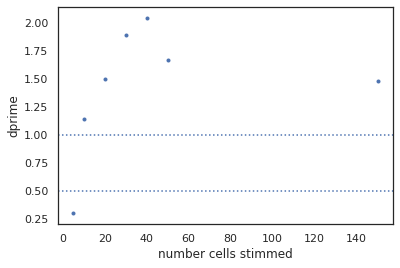

In [29]:
subset_dprimes = get_subset_dprime(run)
plt.plot([5,10,20,30,40,50,150], subset_dprimes, '.')
plt.xlabel("number cells stimmed")
plt.ylabel('dprime')
plt.ylim(min(subset_dprimes)-0.1, max(subset_dprimes)+0.1)

plt.axhline(0.5, linestyle=':')
plt.axhline(1, linestyle=':')
